In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("/Users/eulalieformery/Desktop/Datacamp/kickstarter-projects/ks-projects-201801.csv")
data = data.dropna(subset=['name'])

In [52]:
data['Target'] = np.where( data['usd_pledged_real']>=data['usd_goal_real'], 1, 0)

In [11]:
data['launched_date'] = pd.to_datetime(data['launched'], format='%Y-%m-%d %H:%M:%S')
data['deadline_date'] = pd.to_datetime(data['deadline'], format='%Y-%m-%d %H:%M:%S')

In [12]:
data['year'] = [d.year for d in data['launched_date']]
data['month'] = [d.month for d in data['launched_date']]

# State of projects

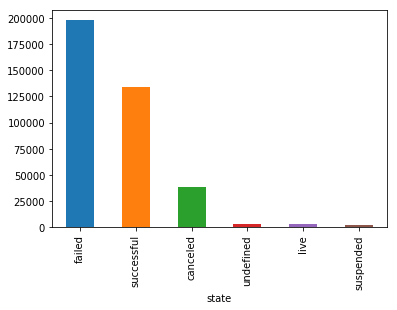

In [47]:
data.groupby('state').count()['ID'].sort_values(ascending=False).plot(kind='bar')


# Categories

Most represented categories

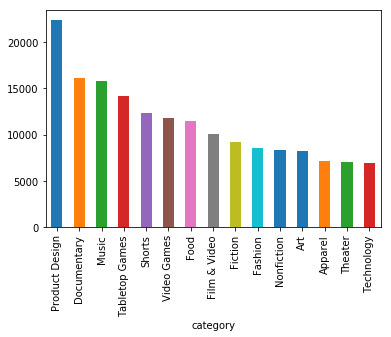

In [51]:
data.groupby('category').count()['ID'].sort_values(ascending=False)[:15].plot(kind='bar')

 Successful projects in each categories

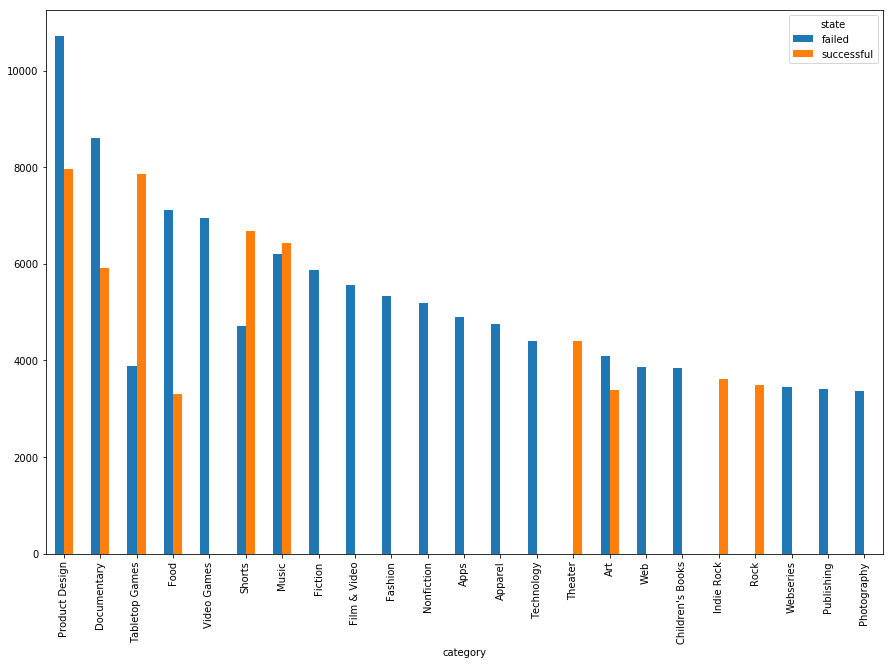

In [59]:
data.groupby(['category','state']).count()['ID'].sort_values(ascending=False)[:30].unstack().plot(kind='bar', figsize = (15,10))

# Year

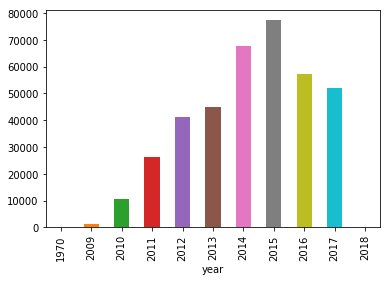

In [60]:
data.groupby('year').count()['ID'].plot(kind='bar')

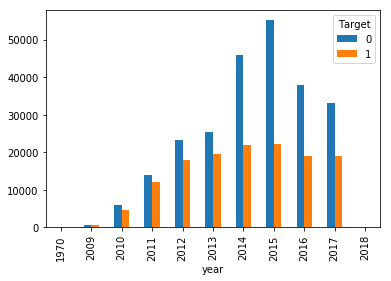

In [62]:
data.groupby(['year','Target']).count()['ID'].unstack().plot(kind='bar')

# Month

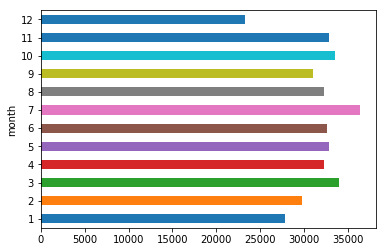

In [63]:
data.groupby('month').count()['ID'].plot(kind='barh')

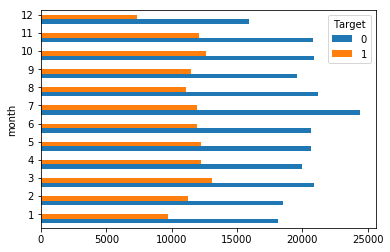

In [73]:
data.groupby(['month','Target']).count()['ID'].unstack().plot(kind='barh', position = 1)

In [83]:
data.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'Target',
       'launched_date', 'deadline_date', 'year', 'month'],
      dtype='object')

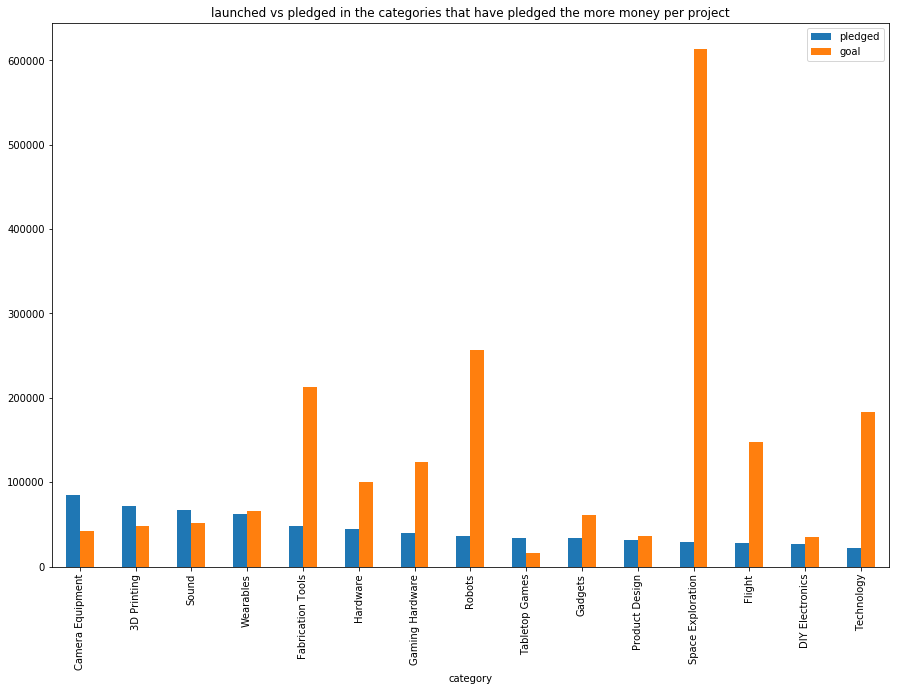

In [88]:
data.groupby('category')['pledged','goal'].mean().sort_values(by='pledged',ascending = False)[:15].plot(kind='bar', figsize=(15,10), title='launched vs pledged in the categories that have pledged the more money per project')

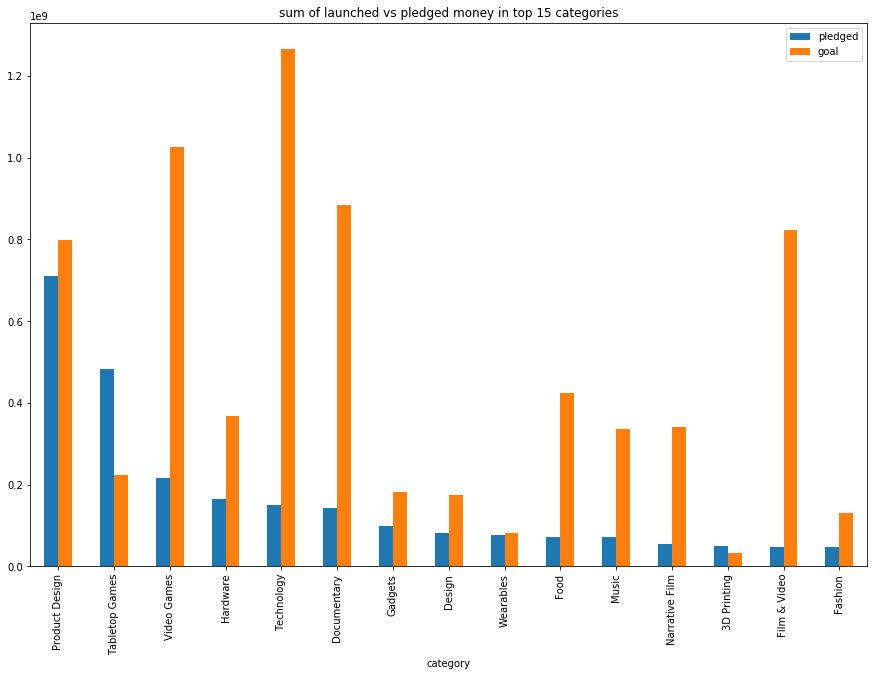

In [90]:
data.groupby('category')['pledged','goal'].sum().sort_values(by='pledged',ascending = False)[:15].plot(kind='bar', figsize=(15,10), title='sum of launched vs pledged money in top 15 categories')

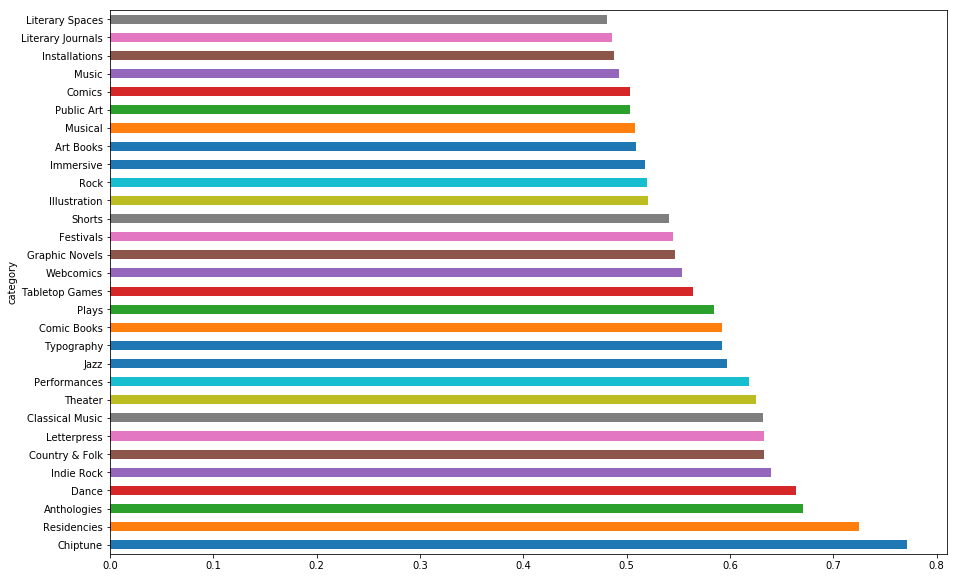

In [102]:
percent_success = data.groupby('category')['Target'].sum()/data.groupby('category')['Target'].count()
percent_success.sort_values(ascending = False)[:30].plot(kind='barh', figsize=(15,10))
